In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Ireland_2021

In [5]:
Ireland_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
5,5,MR Adair (IRE),8,6,3,42,16*,14.00,40,105.00,...,290,3,2/43,96.66,6.10,95.0,0,0,3,0
24,24,A Balbirnie (IRE),14,14,1,421,102,32.38,585,71.96,...,-,-,-,-,-,-,-,-,4,0
45,45,C Campher (IRE),7,6,0,232,56,38.66,287,80.83,...,101,3,2/31,33.66,4.80,42.0,0,0,0,0
68,68,GJ Delany (IRE),4,4,3,53,21*,53.00,47,112.76,...,74,2,1/10,37.00,6.16,36.0,0,0,1,0
75,75,GH Dockrell (IRE),9,8,2,151,45,25.16,196,77.04,...,115,2,1/23,57.50,7.18,48.0,0,0,2,0
91,91,SC Getkate (IRE),1,-,-,-,-,-,-,-,...,25,1,1/25,25.00,5.00,30.0,0,0,0,0
154,154,JB Little (IRE),10,5,2,16,9*,5.33,26,61.53,...,342,17,4/39,20.11,4.68,25.7,1,0,0,0
158,158,AR McBrine (IRE),14,9,0,85,30,9.44,130,65.38,...,403,16,5/29,25.18,3.87,39.0,0,1,3,0
180,180,BJ McCarthy (IRE),7,4,1,11,6,3.66,27,40.74,...,333,6,2/60,55.50,5.55,60.0,0,0,1,0
181,181,JA McCollum (IRE),1,1,0,3,3,3.00,11,27.27,...,-,-,-,-,-,-,-,-,1,0


In [6]:
Ireland_2021=Ireland_2021.reset_index()

In [7]:
Ireland_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,5,5,MR Adair (IRE),8,6,3,42,16*,14.00,40,...,290,3,2/43,96.66,6.10,95.0,0,0,3,0
1,24,24,A Balbirnie (IRE),14,14,1,421,102,32.38,585,...,-,-,-,-,-,-,-,-,4,0
2,45,45,C Campher (IRE),7,6,0,232,56,38.66,287,...,101,3,2/31,33.66,4.80,42.0,0,0,0,0
3,68,68,GJ Delany (IRE),4,4,3,53,21*,53.00,47,...,74,2,1/10,37.00,6.16,36.0,0,0,1,0
4,75,75,GH Dockrell (IRE),9,8,2,151,45,25.16,196,...,115,2,1/23,57.50,7.18,48.0,0,0,2,0
5,91,91,SC Getkate (IRE),1,-,-,-,-,-,-,...,25,1,1/25,25.00,5.00,30.0,0,0,0,0
6,154,154,JB Little (IRE),10,5,2,16,9*,5.33,26,...,342,17,4/39,20.11,4.68,25.7,1,0,0,0
7,158,158,AR McBrine (IRE),14,9,0,85,30,9.44,130,...,403,16,5/29,25.18,3.87,39.0,0,1,3,0
8,180,180,BJ McCarthy (IRE),7,4,1,11,6,3.66,27,...,333,6,2/60,55.50,5.55,60.0,0,0,1,0
9,181,181,JA McCollum (IRE),1,1,0,3,3,3.00,11,...,-,-,-,-,-,-,-,-,1,0


In [8]:
Ireland_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Ireland_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),8,6,3,42,16*,14.00,40,105.00,0,...,290,3,2/43,96.66,6.10,95.0,0,0,3,0
1,A Balbirnie (IRE),14,14,1,421,102,32.38,585,71.96,1,...,-,-,-,-,-,-,-,-,4,0
2,C Campher (IRE),7,6,0,232,56,38.66,287,80.83,0,...,101,3,2/31,33.66,4.80,42.0,0,0,0,0
3,GJ Delany (IRE),4,4,3,53,21*,53.00,47,112.76,0,...,74,2,1/10,37.00,6.16,36.0,0,0,1,0
4,GH Dockrell (IRE),9,8,2,151,45,25.16,196,77.04,0,...,115,2,1/23,57.50,7.18,48.0,0,0,2,0
5,SC Getkate (IRE),1,-,-,-,-,-,-,-,-,...,25,1,1/25,25.00,5.00,30.0,0,0,0,0
6,JB Little (IRE),10,5,2,16,9*,5.33,26,61.53,0,...,342,17,4/39,20.11,4.68,25.7,1,0,0,0
7,AR McBrine (IRE),14,9,0,85,30,9.44,130,65.38,0,...,403,16,5/29,25.18,3.87,39.0,0,1,3,0
8,BJ McCarthy (IRE),7,4,1,11,6,3.66,27,40.74,0,...,333,6,2/60,55.50,5.55,60.0,0,0,1,0
9,JA McCollum (IRE),1,1,0,3,3,3.00,11,27.27,0,...,-,-,-,-,-,-,-,-,1,0


In [10]:
Ireland_2021_players =Ireland_2021.copy()

In [11]:
Ireland_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
Ireland_2021_players.HS=Ireland_2021_players.HS.str.extract('(\d+)')
Ireland_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
Ireland_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,8,6,3,42,16,14.00,40,105.00,0,0,...,290,3,2/43,96.66,6.10,95.0,0,0,3,0
1,14,14,1,421,102,32.38,585,71.96,1,3,...,-,-,-,-,-,-,-,-,4,0
2,7,6,0,232,56,38.66,287,80.83,0,2,...,101,3,2/31,33.66,4.80,42.0,0,0,0,0
3,4,4,3,53,21,53.00,47,112.76,0,0,...,74,2,1/10,37.00,6.16,36.0,0,0,1,0
4,9,8,2,151,45,25.16,196,77.04,0,0,...,115,2,1/23,57.50,7.18,48.0,0,0,2,0
5,1,-,-,-,0,-,-,-,-,-,...,25,1,1/25,25.00,5.00,30.0,0,0,0,0
6,10,5,2,16,9,5.33,26,61.53,0,0,...,342,17,4/39,20.11,4.68,25.7,1,0,0,0
7,14,9,0,85,30,9.44,130,65.38,0,0,...,403,16,5/29,25.18,3.87,39.0,0,1,3,0
8,7,4,1,11,6,3.66,27,40.74,0,0,...,333,6,2/60,55.50,5.55,60.0,0,0,1,0
9,1,1,0,3,3,3.00,11,27.27,0,0,...,-,-,-,-,-,-,-,-,1,0


In [14]:
Ireland_2021_players.replace("-",0,inplace=True)

In [15]:
Ireland_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Ireland_2021_players_scaled = pd.DataFrame(scaler.fit_transform(Ireland_2021_players),columns=Ireland_2021_players.columns)
Ireland_2021_players_scaled.shape
Ireland_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.235058,-0.304893,1.133687,-0.684329,-0.765034,-0.523018,-0.755930,1.376172,-0.392837,-0.721336,...,-0.086066,0.817369,-0.297261,2.530872,0.852863,2.288183,-0.365148,-0.365148,-0.060746,0.0
1,1.096939,1.669650,-0.242933,1.275285,1.390033,0.492215,1.421159,0.105428,0.942809,1.577922,...,-0.573775,-0.955455,-0.756665,-1.146437,-1.682016,-1.250131,-0.365148,-0.365148,0.197423,0.0
2,-0.457058,-0.304893,-0.931243,0.298063,0.237323,0.839096,0.230750,0.446575,-0.392837,0.811503,...,-0.329921,-0.338023,-0.297261,0.134115,0.312643,0.314176,-0.365148,-0.365148,-0.835253,0.0
3,-1.123056,-0.798528,1.133687,-0.627454,-0.639740,1.631177,-0.727968,1.674628,-0.392837,-0.721336,...,-0.573775,-0.503079,-0.450396,0.261182,0.877797,0.090704,-0.365148,-0.365148,-0.577084,0.0
4,-0.013059,0.188743,0.445377,-0.120746,-0.038325,0.093413,-0.132764,0.300809,-0.392837,-0.721336,...,-0.573775,-0.252439,-0.450396,1.041078,1.301662,0.537648,-0.365148,-0.365148,-0.318915,0.0


In [17]:
Ireland_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,...,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.0
mean,1.240837e-16,3.755166e-17,-7.836868e-17,-3.265362e-17,-3.265362e-17,-6.530724e-17,-5.877651e-17,4.767428e-16,-1.959217e-17,-3.265362e-17,...,-5.877651e-17,6.530724e-17,-2.612289e-17,5.387847e-17,-1.077569e-16,9.469549e-17,-2.612289e-17,-1.959217e-17,-6.530724e-18,0.0
std,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,...,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,0.0
min,-1.789055e+00,-1.785800e+00,-9.312428e-01,-9.014896e-01,-1.165977e+00,-1.296318e+00,-9.157168e-01,-2.662210e+00,-3.928371e-01,-7.213357e-01,...,-5.737753e-01,-9.554551e-01,-7.566646e-01,-1.146437e+00,-1.682016e+00,-1.250131e+00,-3.651484e-01,-3.651484e-01,-8.352530e-01,0.0
25%,-6.790572e-01,-5.517105e-01,-9.312428e-01,-7.618865e-01,-8.652699e-01,-9.980450e-01,-7.759038e-01,-1.476442e-01,-3.928371e-01,-7.213357e-01,...,-5.737753e-01,-8.148518e-01,-7.566646e-01,-1.146437e+00,-1.569327e-01,-1.250131e+00,-3.651484e-01,-3.651484e-01,-5.770839e-01,0.0
50%,-1.305879e-02,-3.048926e-01,-2.429329e-01,-4.619982e-01,-4.142093e-01,-3.141939e-02,-3.964112e-01,1.442732e-01,-3.928371e-01,-7.213357e-01,...,-5.737753e-01,-5.030793e-01,-4.503956e-01,-1.884956e-01,3.126432e-01,9.070353e-02,-3.651484e-01,-3.651484e-01,-6.074567e-02,0.0
75%,1.096939e+00,4.355609e-01,4.453770e-01,2.980634e-01,8.136780e-01,7.932503e-01,3.865420e-01,4.465750e-01,-3.928371e-01,8.115027e-01,...,-8.606630e-02,1.080236e+00,1.621424e-01,8.318378e-01,7.074195e-01,5.376485e-01,-3.651484e-01,-3.651484e-01,-6.074567e-02,0.0
max,1.096939e+00,1.669650e+00,2.510307e+00,2.743704e+00,2.116742e+00,1.699117e+00,2.619556e+00,1.674628e+00,3.614101e+00,2.344341e+00,...,3.084042e+00,1.868837e+00,2.152891e+00,2.530872e+00,1.301662e+00,2.288183e+00,2.738613e+00,2.738613e+00,3.553622e+00,0.0


In [18]:
X =  Ireland_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[-2.35058264e-01, -3.04892650e-01,  1.13368686e+00,
        -6.84329168e-01, -7.65034181e-01, -5.23017551e-01,
        -7.55930485e-01,  1.37617212e+00, -3.92837101e-01,
        -7.21335708e-01, -6.86406473e-01, -7.21962945e-01,
        -1.67053814e-01, -1.55664893e+00, -2.35058264e-01,
         4.19190711e-01,  3.86416128e-01, -8.60662966e-02,
         8.17369044e-01, -2.97261110e-01,  2.53087174e+00,
         8.52863334e-01,  2.28818285e+00, -3.65148372e-01,
        -3.65148372e-01, -6.07456739e-02,  0.00000000e+00],
       [ 1.09693857e+00,  1.66965022e+00, -2.42932899e-01,
         1.27528542e+00,  1.39003320e+00,  4.92215499e-01,
         1.42115871e+00,  1.05427797e-01,  9.42809042e-01,
         1.57792186e+00, -6.86406473e-01,  1.47545266e+00,
         6.96057558e-02, -1.38826394e+00,  1.09693857e+00,
        -1.05520420e+00, -8.74099931e-01, -5.73775311e-01,
        -9.55455148e-01, -7.56664643e-01, -1.14643725e+00,
        -1.68201565e+00, -1.25013131e+00, -3.65148372e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Ireland_2021_players_scaled))

False

In [23]:
Ireland_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.235058,-0.304893,1.133687,-0.684329,-0.765034,-0.523018,-0.755930,1.376172,-0.392837,-0.721336,...,-0.086066,0.817369,-0.297261,2.530872,0.852863,2.288183,-0.365148,-0.365148,-0.060746,0.0
1,1.096939,1.669650,-0.242933,1.275285,1.390033,0.492215,1.421159,0.105428,0.942809,1.577922,...,-0.573775,-0.955455,-0.756665,-1.146437,-1.682016,-1.250131,-0.365148,-0.365148,0.197423,0.0
2,-0.457058,-0.304893,-0.931243,0.298063,0.237323,0.839096,0.230750,0.446575,-0.392837,0.811503,...,-0.329921,-0.338023,-0.297261,0.134115,0.312643,0.314176,-0.365148,-0.365148,-0.835253,0.0
3,-1.123056,-0.798528,1.133687,-0.627454,-0.639740,1.631177,-0.727968,1.674628,-0.392837,-0.721336,...,-0.573775,-0.503079,-0.450396,0.261182,0.877797,0.090704,-0.365148,-0.365148,-0.577084,0.0
4,-0.013059,0.188743,0.445377,-0.120746,-0.038325,0.093413,-0.132764,0.300809,-0.392837,-0.721336,...,-0.573775,-0.252439,-0.450396,1.041078,1.301662,0.537648,-0.365148,-0.365148,-0.318915,0.0
5,-1.789055,-1.785800,-0.931243,-0.901490,-1.165977,-1.296318,-0.915717,-2.662210,-0.392837,-0.721336,...,-0.573775,-0.802625,-0.603530,-0.195343,0.395754,-0.132769,-0.365148,-0.365148,-0.835253,0.0
6,0.208941,-0.551711,0.445377,-0.818762,-0.940447,-1.001911,-0.811856,-0.295718,-0.392837,-0.721336,...,0.157788,1.135255,1.846622,-0.381377,0.262777,-0.292924,2.738613,-0.365148,-0.835253,0.0
7,1.096939,0.435561,-0.931243,-0.461998,-0.414209,-0.774893,-0.396411,-0.147644,-0.392837,-0.721336,...,1.864770,1.508159,1.693488,-0.188496,-0.073822,0.202440,-0.365148,2.738613,-0.060746,0.0
8,-0.457058,-0.798528,-0.242933,-0.844614,-1.015623,-1.094155,-0.807861,-1.095318,-0.392837,-0.721336,...,-0.086066,1.080236,0.162142,0.964991,0.624309,0.984593,-0.365148,-0.365148,-0.577084,0.0
9,-1.789055,-1.538982,-0.931243,-0.885978,-1.090800,-1.130611,-0.871776,-1.613385,-0.392837,-0.721336,...,-0.573775,-0.955455,-0.756665,-1.146437,-1.682016,-1.250131,-0.365148,-0.365148,-0.577084,0.0


In [24]:
np.all(np.isfinite(Ireland_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


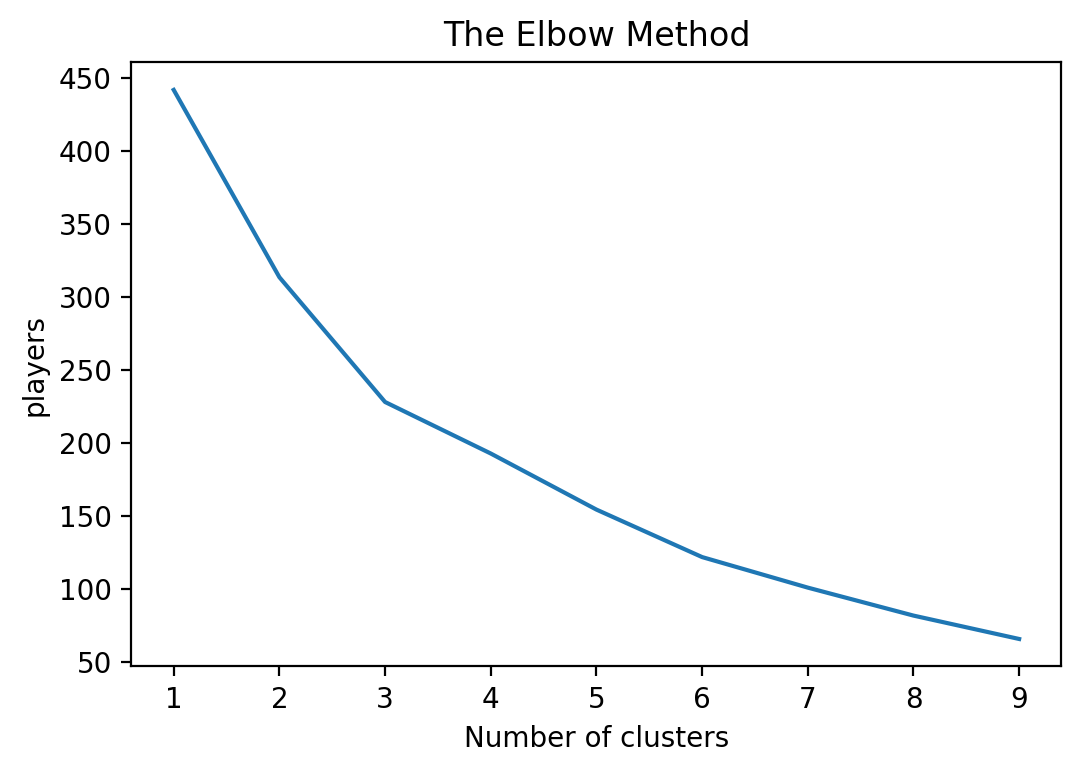

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0])

In [28]:
kmeans.cluster_centers_

array([[ 0.76393936,  0.1270386 ,  0.78953192, -0.3715147 , -0.2200026 ,
        -0.31464069, -0.40340182,  0.19071459, -0.05892557, -0.52973091,
         0.1470871 , -0.34679443, -0.40371338,  0.54151677,  0.76393936,
         1.5249869 ,  1.60629187,  1.498988  ,  1.47453663,  1.73177116,
        -0.18611786,  0.11213845,  0.04973358,  1.18673221,  1.18673221,
        -0.06074567,  0.        ],
       [-0.84555681, -0.7368239 , -0.15689416, -0.56605428, -0.63347483,
        -0.30980756, -0.59364746, -0.17855702, -0.3928371 , -0.52973091,
        -0.06128629, -0.54107812, -0.43329583, -0.63496263, -0.84555681,
        -0.16442394, -0.29680756, -0.39088443, -0.19741998, -0.41211199,
         0.56229783,  0.3588736 ,  0.5329928 , -0.36514837, -0.36514837,
        -0.48027048,  0.        ],
       [ 0.74173941,  1.07728736, -0.38059488,  1.2028986 ,  1.18956182,
         0.74740466,  1.27255739,  0.13311956,  0.67567981,  1.27135418,
        -0.01961161,  1.14316054,  1.01624403,  0.5827

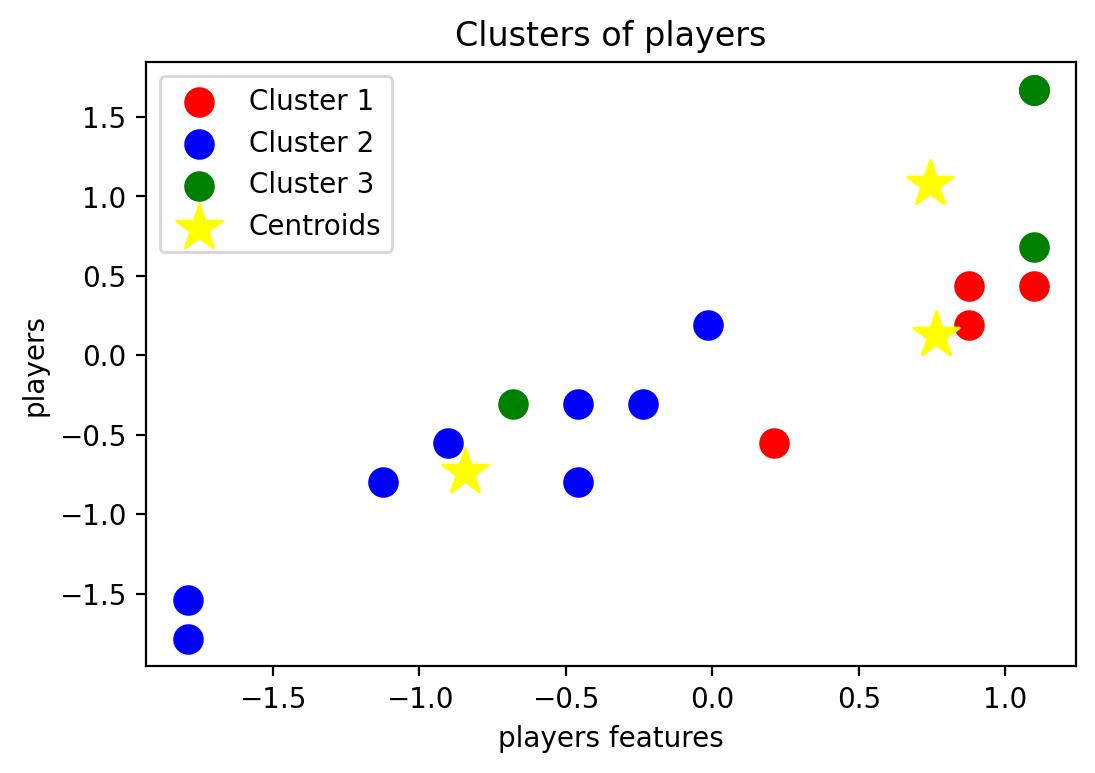

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Ireland_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),8,6,3,42,16*,14.00,40,105.00,0,...,290,3,2/43,96.66,6.10,95.0,0,0,3,0
1,A Balbirnie (IRE),14,14,1,421,102,32.38,585,71.96,1,...,-,-,-,-,-,-,-,-,4,0
2,C Campher (IRE),7,6,0,232,56,38.66,287,80.83,0,...,101,3,2/31,33.66,4.80,42.0,0,0,0,0
3,GJ Delany (IRE),4,4,3,53,21*,53.00,47,112.76,0,...,74,2,1/10,37.00,6.16,36.0,0,0,1,0
4,GH Dockrell (IRE),9,8,2,151,45,25.16,196,77.04,0,...,115,2,1/23,57.50,7.18,48.0,0,0,2,0
5,SC Getkate (IRE),1,-,-,-,-,-,-,-,-,...,25,1,1/25,25.00,5.00,30.0,0,0,0,0
6,JB Little (IRE),10,5,2,16,9*,5.33,26,61.53,0,...,342,17,4/39,20.11,4.68,25.7,1,0,0,0
7,AR McBrine (IRE),14,9,0,85,30,9.44,130,65.38,0,...,403,16,5/29,25.18,3.87,39.0,0,1,3,0
8,BJ McCarthy (IRE),7,4,1,11,6,3.66,27,40.74,0,...,333,6,2/60,55.50,5.55,60.0,0,0,1,0
9,JA McCollum (IRE),1,1,0,3,3,3.00,11,27.27,0,...,-,-,-,-,-,-,-,-,1,0


In [31]:
Ireland_2021["cluster"] = y_kmeans

In [32]:
Ireland_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MR Adair (IRE),8,6,3,42,16*,14.00,40,105.00,0,...,3,2/43,96.66,6.10,95.0,0,0,3,0,1
1,A Balbirnie (IRE),14,14,1,421,102,32.38,585,71.96,1,...,-,-,-,-,-,-,-,4,0,2
2,C Campher (IRE),7,6,0,232,56,38.66,287,80.83,0,...,3,2/31,33.66,4.80,42.0,0,0,0,0,1
3,GJ Delany (IRE),4,4,3,53,21*,53.00,47,112.76,0,...,2,1/10,37.00,6.16,36.0,0,0,1,0,1
4,GH Dockrell (IRE),9,8,2,151,45,25.16,196,77.04,0,...,2,1/23,57.50,7.18,48.0,0,0,2,0,1
5,SC Getkate (IRE),1,-,-,-,-,-,-,-,-,...,1,1/25,25.00,5.00,30.0,0,0,0,0,1
6,JB Little (IRE),10,5,2,16,9*,5.33,26,61.53,0,...,17,4/39,20.11,4.68,25.7,1,0,0,0,0
7,AR McBrine (IRE),14,9,0,85,30,9.44,130,65.38,0,...,16,5/29,25.18,3.87,39.0,0,1,3,0,0
8,BJ McCarthy (IRE),7,4,1,11,6,3.66,27,40.74,0,...,6,2/60,55.50,5.55,60.0,0,0,1,0,1
9,JA McCollum (IRE),1,1,0,3,3,3.00,11,27.27,0,...,-,-,-,-,-,-,-,1,0,1


In [33]:
Ireland_2021['cluster'].value_counts()

1    8
2    5
0    4
Name: cluster, dtype: int64

In [34]:
Ireland_Cluster_2021 = np.array([4,8,5])

In [35]:
Ireland_Cluster_2021

array([4, 8, 5])

In [36]:
%store Ireland_Cluster_2021

Stored 'Ireland_Cluster_2021' (ndarray)


In [37]:
Ireland_2021_players_scaled.insert(0, 'Player', Ireland_2021.Player)

In [38]:
Ireland_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),-0.235058,-0.304893,1.133687,-0.684329,-0.765034,-0.523018,-0.755930,1.376172,-0.392837,...,-0.086066,0.817369,-0.297261,2.530872,0.852863,2.288183,-0.365148,-0.365148,-0.060746,0.0
1,A Balbirnie (IRE),1.096939,1.669650,-0.242933,1.275285,1.390033,0.492215,1.421159,0.105428,0.942809,...,-0.573775,-0.955455,-0.756665,-1.146437,-1.682016,-1.250131,-0.365148,-0.365148,0.197423,0.0
2,C Campher (IRE),-0.457058,-0.304893,-0.931243,0.298063,0.237323,0.839096,0.230750,0.446575,-0.392837,...,-0.329921,-0.338023,-0.297261,0.134115,0.312643,0.314176,-0.365148,-0.365148,-0.835253,0.0
3,GJ Delany (IRE),-1.123056,-0.798528,1.133687,-0.627454,-0.639740,1.631177,-0.727968,1.674628,-0.392837,...,-0.573775,-0.503079,-0.450396,0.261182,0.877797,0.090704,-0.365148,-0.365148,-0.577084,0.0
4,GH Dockrell (IRE),-0.013059,0.188743,0.445377,-0.120746,-0.038325,0.093413,-0.132764,0.300809,-0.392837,...,-0.573775,-0.252439,-0.450396,1.041078,1.301662,0.537648,-0.365148,-0.365148,-0.318915,0.0
5,SC Getkate (IRE),-1.789055,-1.785800,-0.931243,-0.901490,-1.165977,-1.296318,-0.915717,-2.662210,-0.392837,...,-0.573775,-0.802625,-0.603530,-0.195343,0.395754,-0.132769,-0.365148,-0.365148,-0.835253,0.0
6,JB Little (IRE),0.208941,-0.551711,0.445377,-0.818762,-0.940447,-1.001911,-0.811856,-0.295718,-0.392837,...,0.157788,1.135255,1.846622,-0.381377,0.262777,-0.292924,2.738613,-0.365148,-0.835253,0.0
7,AR McBrine (IRE),1.096939,0.435561,-0.931243,-0.461998,-0.414209,-0.774893,-0.396411,-0.147644,-0.392837,...,1.864770,1.508159,1.693488,-0.188496,-0.073822,0.202440,-0.365148,2.738613,-0.060746,0.0
8,BJ McCarthy (IRE),-0.457058,-0.798528,-0.242933,-0.844614,-1.015623,-1.094155,-0.807861,-1.095318,-0.392837,...,-0.086066,1.080236,0.162142,0.964991,0.624309,0.984593,-0.365148,-0.365148,-0.577084,0.0
9,JA McCollum (IRE),-1.789055,-1.538982,-0.931243,-0.885978,-1.090800,-1.130611,-0.871776,-1.613385,-0.392837,...,-0.573775,-0.955455,-0.756665,-1.146437,-1.682016,-1.250131,-0.365148,-0.365148,-0.577084,0.0


In [39]:
Ireland_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MR Adair (IRE),-0.523018,2.530872
1,A Balbirnie (IRE),0.492215,-1.146437
2,C Campher (IRE),0.839096,0.134115
3,GJ Delany (IRE),1.631177,0.261182
4,GH Dockrell (IRE),0.093413,1.041078
5,SC Getkate (IRE),-1.296318,-0.195343
6,JB Little (IRE),-1.001911,-0.381377
7,AR McBrine (IRE),-0.774893,-0.188496
8,BJ McCarthy (IRE),-1.094155,0.964991
9,JA McCollum (IRE),-1.130611,-1.146437


In [40]:
Ireland_2021_Ave=Ireland_2021_players_scaled.mean()

In [41]:
Ireland_2021_Ave

Mat_x           1.240837e-16
Inns_x          3.755166e-17
NO             -7.836868e-17
Runs_x         -3.265362e-17
HS             -3.265362e-17
Ave_x          -6.530724e-17
BF             -5.877651e-17
SR_x            4.767428e-16
100            -1.959217e-17
50             -3.265362e-17
0               4.571507e-17
4s              1.959217e-17
6s             -4.571507e-17
Unnamed: 0_y   -9.143013e-17
Mat_y           1.240837e-16
Inns_y          2.612289e-17
Overs          -1.436759e-16
Mdns           -5.877651e-17
Runs_y          6.530724e-17
Wkts           -2.612289e-17
Ave_y           5.387847e-17
Econ           -1.077569e-16
SR_y            9.469549e-17
4              -2.612289e-17
5              -1.959217e-17
Ct             -6.530724e-18
St              0.000000e+00
dtype: float64

In [42]:
Ireland_Ave_2021 =Ireland_2021_Ave[['Ave_x','Ave_y']]

In [43]:
Ireland_Ave_2021

Ave_x   -6.530724e-17
Ave_y    5.387847e-17
dtype: float64

In [44]:
Ireland_Ave_2021 = np.array([Ireland_Ave_2021.Ave_x, Ireland_Ave_2021.Ave_y])

In [45]:
Ireland_Ave_2021

array([-6.53072367e-17,  5.38784703e-17])

In [46]:
%store Ireland_Ave_2021

Stored 'Ireland_Ave_2021' (ndarray)


In [47]:
Ireland_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MR Adair (IRE),8,6,3,42,16*,14.00,40,105.00,0,...,3,2/43,96.66,6.10,95.0,0,0,3,0,1
1,A Balbirnie (IRE),14,14,1,421,102,32.38,585,71.96,1,...,-,-,-,-,-,-,-,4,0,2
2,C Campher (IRE),7,6,0,232,56,38.66,287,80.83,0,...,3,2/31,33.66,4.80,42.0,0,0,0,0,1
3,GJ Delany (IRE),4,4,3,53,21*,53.00,47,112.76,0,...,2,1/10,37.00,6.16,36.0,0,0,1,0,1
4,GH Dockrell (IRE),9,8,2,151,45,25.16,196,77.04,0,...,2,1/23,57.50,7.18,48.0,0,0,2,0,1
5,SC Getkate (IRE),1,-,-,-,-,-,-,-,-,...,1,1/25,25.00,5.00,30.0,0,0,0,0,1
6,JB Little (IRE),10,5,2,16,9*,5.33,26,61.53,0,...,17,4/39,20.11,4.68,25.7,1,0,0,0,0
7,AR McBrine (IRE),14,9,0,85,30,9.44,130,65.38,0,...,16,5/29,25.18,3.87,39.0,0,1,3,0,0
8,BJ McCarthy (IRE),7,4,1,11,6,3.66,27,40.74,0,...,6,2/60,55.50,5.55,60.0,0,0,1,0,1
9,JA McCollum (IRE),1,1,0,3,3,3.00,11,27.27,0,...,-,-,-,-,-,-,-,1,0,1
